In [1]:
# Download arabic wikipedia extract

# Extract it with WikiExtractor

# Clean the wikimarkup out (with e.g. simple regex methods)

# Tokenize it? NO, SKIP THIS STEP

# Downsample the corpus

# Romanize it with uroman

In [ ]:
! conda activate LexResProject && pip install -r requirements.ar_rom.txt

In [1]:
# import contextlib
# import hashlib
# import itertools
import os

# import shutil
import sys
import time

# from collections import namedtuple

import logging as logger
import random
from pathlib import Path

from pprint import pprint

In [3]:
"""
import filehash
import fire
import numpy
import pendulum
import sarge
import torch
"""

import blingfire
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Download arabic wikipedia extract

```
NO! # https://dumps.wikimedia.org/arwiki/latest/arwiki-latest-pages-articles.xml.bz2
YES # https://dumps.wikimedia.org/arwiki/20230201/arwiki-20230201-pages-articles.xml.bz2

https://dumps.wikimedia.org/arwiki/20230201/arwiki-20230201-sha1sums.txt
```

https://dumps.wikimedia.org/arwiki/20230201/

See instructions here: https://github.com/attardi/wikiextractor 

In [3]:
%%bash
# wget https://dumps.wikimedia.org/arwiki/20230201/arwiki-20230201-sha1sums.txt

--2023-02-10 23:26:10--  https://dumps.wikimedia.org/arwiki/20230201/arwiki-20230201-sha1sums.txt
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.142, 2620:0:861:2:208:80:154:142
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19150 (19K) [text/plain]
Saving to: ‘arwiki-20230201-sha1sums.txt.1’

     0K .......... ........                                   100%  131M=0s

2023-02-10 23:26:11 (131 MB/s) - ‘arwiki-20230201-sha1sums.txt.1’ saved [19150/19150]



In [90]:
""" 1.38G  4.32MB/s    in 5m 27s  """
#! wget https://dumps.wikimedia.org/arwiki/20230201/arwiki-20230201-pages-articles.xml.bz2

' 1.38G  4.32MB/s    in 5m 27s  '

In [4]:
%%bash
sha1sum --ignore-missing --check arwiki-20230201-sha1sums.txt

arwiki-20230201-pages-articles.xml.bz2: OK


## Extract it with WikiExtractor

In [6]:
"""
NOTE: wikiextractor will not work with python 3.11. It will work with 3.10.

Option --no-templates significantly speeds up the extractor, avoiding the cost of expanding MediaWiki templates.
"""
# ! time python -m wikiextractor.WikiExtractor arwiki-20230201-pages-articles.xml.bz2

With template processing:
```
INFO: Preprocessed 3400000 pages
INFO: Loaded 126172 templates in 425.4s
```

In [6]:
"""With --no-templates, we jump immediately to the extraction step (no preprocessing pages)."""

# ! time python -m wikiextractor.WikiExtractor --no-templates arwiki-20230201-pages-articles.xml.bz2

'\nWith template procesing included:\n\n...\nINFO: Preprocessed 3400000 pages\nINFO: Loaded 126172 templates in 425.4s\n'

```bash
╭─user at s-m2tal in ⌁/cours/LexResCerisara/ANSProj/faroese_mBERT (scott ●3…104)
╰─λ time python -m wikiextractor.WikiExtractor --no-templates arwiki-20230201-pages-articles.xml.bz2                                    (LexResProject)

INFO: Starting page extraction from arwiki-20230201-pages-articles.xml.bz2.
INFO: Using 1 extract processes.
INFO: Extracted 100000 articles (1094.8 art/s)
INFO: Extracted 200000 articles (1673.1 art/s)
INFO: Extracted 300000 articles (1844.7 art/s)
INFO: Extracted 400000 articles (1650.6 art/s)
INFO: Extracted 500000 articles (1812.1 art/s)
INFO: Extracted 600000 articles (1985.7 art/s)
INFO: Extracted 700000 articles (3096.2 art/s)
INFO: Extracted 800000 articles (2146.3 art/s)
INFO: Extracted 900000 articles (2016.3 art/s)
INFO: Extracted 1000000 articles (1978.5 art/s)
INFO: Extracted 1100000 articles (1490.3 art/s)
INFO: Extracted 1200000 articles (2329.1 art/s)
INFO: Extracted 1300000 articles (2531.2 art/s)
INFO: Extracted 1400000 articles (2942.8 art/s)
INFO: Extracted 1500000 articles (3129.7 art/s)
INFO: Extracted 1600000 articles (2685.5 art/s)
INFO: Extracted 1700000 articles (3340.0 art/s)
INFO: Extracted 1800000 articles (2942.4 art/s)
INFO: Extracted 1900000 articles (1992.6 art/s)
INFO: Extracted 2000000 articles (1589.1 art/s)
INFO: Extracted 2100000 articles (1736.0 art/s)
INFO: Extracted 2200000 articles (1526.2 art/s)
INFO: Finished 1-process extraction of 2219910 articles in 1115.8s (1989.6 art/s)

________________________________________________________
Executed in   18.60 mins   fish           external 
   usr time  1541.75 secs  357.00 micros  1541.75 secs 
   sys time   87.66 secs  135.00 micros   87.66 secs 

╭─user at s-m2tal in ⌁/cours/LexResCerisara/ANSProj/faroese_mBERT (scott ●3✚1…2261)
╰─λ                                                                                                                                  (LexResProject) 0 (18:35.847) < 17:18:1100000
    
```

https://github.com/attardi/wikiextractor/wiki/File-Format

"
Document files contains a series of Wikipedia articles, represented each by an XML <tt>doc</tt> element: ... ... ... ...

The element <tt>doc</tt> has the following attributes:

    <tt>id</tt>, which identifies the document by means of a unique serial number
    <tt>url</tt>, which provides the URL of the original Wikipedia page.

The content of a <tt>doc</tt> element consists of pure text, one sentence per line.

Here is an example of a <tt>doc</tt> element:
Harmonium. L'harmonium è uno strumento musicale azionato con una tastiera, detta manuale. Sono stati costruiti anche alcuni harmonium con due manuali. ...

Notice that because of Wikipedia conventions, the first sentence is the title of the article.

Such documents are produced by Wikipedia Extractor .
"

## Clean the wikimarkup out


See:
https://towardsdatascience.com/pre-processing-a-wikipedia-dump-for-nlp-model-training-a-write-up-3b9176fdf67  

According to this link, simple regexes should do the trick.
Note that if we want to downsample the corpus in an article-aware way, we should do so before removing these `<doc>` tags.

```bash
python3 -m wikiextractor.WikiExtractor  $WIKI_DUMP_FILE_IN --processes 8 -q -o - \
| sed "/^\s*\$/d" \
| grep -v "^<doc id=" \
| grep -v "</doc>\$" \
> $WIKI_DUMP_FILE_OUT
```

Strategy 1:

To maintain flexibility in corpus generation, filtering etc, and because we are not sure how subsequent operations (e.g. uroman-quick.pl) will perform on gigantic files; 
we will keep things in an array of files at this step, and concat everything into one giant file later. 

We can always merge everything easily, but splitting back into small files after merging is harder.

Note however that there may be some performance hit, due to starting up a new process for each file in the loop. 
Unclear how much performance may/may not be lost.

This would look like: 
Build a list of files to clean based on a directory and/or glob, then make a list of paths for the cleaned output files -- at a different dir prefix. 
Then loop thru the clean operation, cleaning each one.

Note, can also use built-in `fileinput` module. https://towardsdatascience.com/the-best-practice-of-reading-text-files-in-python-509b1d4f5a4  

Strategy 2:

Merge-concat everything into one file now, and be done with it. Just work with a single megafile from here onward.
This does seem easiest since we can use straight bash commands for filtering without worrying about looping (and feeding multiple paths) in bash.

**We will use strategy 2 (merge-concat everything into one file now).**

In one step, we will do the concatenation *and* strip wikitext markup with some simple regexes.

In [3]:
%%bash
time cat text/*/*  \
    | sed "/^\s*\$/d" \
    | grep -v "^<doc id=" \
    | grep -v "</doc>\$"  \
    > corpus_ar.txt


real	0m39.014s
user	0m54.236s
sys	0m10.481s


In [76]:
%%bash
head -n 2 corpus_ar.txt 

head -n 2 corpus_ar.txt | ../uroman/bin/uroman-quick.pl -l ara 

ماء
الماء مادةٌ شفافةٌ عديمة اللون والرائحة، وهو المكوّن الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع الكائنات الحيّة، وهو أكثر المركّبات الكيميائيّة انتشاراً على سطح الأرض. يتألّف جزيء الماء من ذرّة أكسجين مركزية ترتبط بها ذرّتا هيدروجين على طرفيها برابطة تساهميّة بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة يكون الماء سائلاً؛ أمّا الحالة الصلبة فتتشكّل عند نقطة التجمّد، وتدعى بالجليد؛ أمّا الحالة الغازية فتتشكّل عند نقطة الغليان، وتسمّى بخار الماء.
ma'
alma' mada shfafa 'dyma allwn walrayeha, whw almkwn alasasy lljdawl walbhyrat walbhar walmhytat wkthlk llswayel fy jmy' alkayenat alhya, whw akthr almrkbat alkymyayeya antsharan 'la sth alard. ytalf jzy' alma' mn thra aksjyn mrkzya trtbt bha thrta hydrwjyn 'la trfyha brabta tsahmya bhyth tkwn syghth alkymyayeya H2O. 'nd alzrwf alqyasya mn aldght wdrja alhrara ykwn alma' sayelan; ama alhala alslba fttshkl 'nd nqta altjmd, wtd'a baljlyd; ama alhala alghazya fttshkl 'nd nqta alghlyan, wts

## [SKIP THIS STEP! Do not use] Tokenize it

In [161]:
'''NOTE: we should SKIP THIS STEP. It is messed up, it outputs BOTH the original input and its tokenized form.

Tokenization at this point is not essential, so we will skip it completely.'''
###########################################

BLINGFIRE_MODEL_FILENAME = "bert_multi_cased.bin"


def _tokenize_with_model(h, wiki_dump_file_in, wiki_dump_file_out=""):
    """FUNCTION NOT WORKING.
    
    expects entire corpus in a single file.

    h: a blingfire model object."""
    wiki_dump_file_in = Path(wiki_dump_file_in)
    if wiki_dump_file_out == "":
        wiki_dump_file_out = (
            wiki_dump_file_in.parent
            / f"{wiki_dump_file_in.stem}_preprocessed{wiki_dump_file_in.suffix}"
        )

    print(f"Pre-processing {wiki_dump_file_in} to {wiki_dump_file_out}...")
    with open(wiki_dump_file_out, "w", encoding="utf-8") as out_f:
        with open(wiki_dump_file_in, "r", encoding="utf-8") as in_f:
            count = 0
            for line in in_f:
                #sentences = blingfire.text_to_sentences_with_model(h, line)
                #sentences = sentences.split('\n')
                #print(f"{sentences=}")
                #for sent in sentences.split("\n"):
                    #print(f"{sent=}")
                    
                words = blingfire.text_to_sentences_with_model(h, line)
                #words = words.split(" ")
                #words = " ".join(words)
                #print(f"{words=}")
                print('words::')
                pprint(words)
                
                #line_to_write = " ".join(words) + "\n"
                line_to_write = words + "\n"
                        
                    #print(f"{line=}")
                print(f"{line_to_write=}")
                
                out_f.write(line_to_write)
                count += 1
                if count > 1:
                    break
                
    print(f"Successfully pre-processed {wiki_dump_file_in} to {wiki_dump_file_out}...")


def do_tokenize(wiki_dump_file_in, wiki_dump_file_out=""):
    """expects entire corpus in a single file"""
    # one time load the model (we are using one that comes with the package)
    h = blingfire.load_model(
        os.path.join(os.path.dirname(blingfire.__file__), BLINGFIRE_MODEL_FILENAME)
    )
    print("Model Handle: %s" % h)

    _tokenize_with_model(h, wiki_dump_file_in, wiki_dump_file_out=wiki_dump_file_out)

    # free the model at the end
    blingfire.free_model(h)
    print("Model Freed")

In [162]:
#do_tokenize("corpus_ar.txt") # DO NOT USE THIS!

^ for above:
```bash
executed in 3m 39s

Model Handle: 100702737517696
Pre-processing corpus_ar.txt to corpus_ar_preprocessed.txt...
Successfully pre-processed corpus_ar.txt to corpus_ar_preprocessed.txt...
Model Freed
```

In [163]:
%%bash
# Since we are skipping tokenization, we will simply copy the file.

# cp  corpus_ar.txt  corpus_ar_preprocessed.txt

In [122]:
%%bash
set -x
head -n 5 corpus_ar_preprocessed.txt
head -n 5 corpus_ar_preprocessed.txt | ../uroman/bin/uroman-quick.pl -l ara
# wc -l corpus_ar_preprocessed.txt

+ head -n 5 corpus_ar_preprocessed.txt


ماء
الماء مادةٌ شفافةٌ عديمة اللون والرائحة، وهو المكوّن الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع الكائنات الحيّة، وهو أكثر المركّبات الكيميائيّة انتشاراً على سطح الأرض. يتألّف جزيء الماء من ذرّة أكسجين مركزية ترتبط بها ذرّتا هيدروجين على طرفيها برابطة تساهميّة بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة يكون الماء سائلاً؛ أمّا الحالة الصلبة فتتشكّل عند نقطة التجمّد، وتدعى بالجليد؛ أمّا الحالة الغازية فتتشكّل عند نقطة الغليان، وتسمّى بخار الماء.
إنّ الماء هو أساس وجود الحياة على كوكب الأرض، وهو يغطّي 71% من سطحها، وتمثّل مياه البحار والمحيطات أكبر نسبة للماء على الأرض، حيث تبلغ حوالي 96.5%. وتتوزّع النسب الباقية بين المياه الجوفيّة وبين جليد المناطق القطبيّة (1.7% لكليهما)، مع وجود نسبة صغيرة على شكل بخار ماء معلّق في الهواء على هيئة سحاب (غيوم)، وأحياناً أخرى على هيئة ضباب أو ندى، بالإضافة إلى الزخات المطريّة أو الثلجيّة. تبلغ نسبة الماء العذب حوالي 2.5% فقط من الماء الموجود على الأرض، وأغلب هذه الكمّيّة (حوالي 99%) موجودة في الك

+ head -n 5 corpus_ar_preprocessed.txt
+ ../uroman/bin/uroman-quick.pl -l ara


ma'
alma' mada shfafa 'dyma allwn walrayeha, whw almkwn alasasy lljdawl walbhyrat walbhar walmhytat wkthlk llswayel fy jmy' alkayenat alhya, whw akthr almrkbat alkymyayeya antsharan 'la sth alard. ytalf jzy' alma' mn thra aksjyn mrkzya trtbt bha thrta hydrwjyn 'la trfyha brabta tsahmya bhyth tkwn syghth alkymyayeya H2O. 'nd alzrwf alqyasya mn aldght wdrja alhrara ykwn alma' sayelan; ama alhala alslba fttshkl 'nd nqta altjmd, wtd'a baljlyd; ama alhala alghazya fttshkl 'nd nqta alghlyan, wtsma bkhar alma'.
in alma' hw asas wjwd alhyaa 'la kwkb alard, whw yghty 71% mn sthha, wtmthl myah albhar walmhytat akbr nsba llma' 'la alard, hyth tblgh hwaly 96.5%. wttwz' alnsb albaqya byn almyah aljwfya wbyn jlyd almnatq alqtbya (1.7% lklyhma), m' wjwd nsba sghyra 'la shkl bkhar ma' m'lq fy alhwa' 'la hyyea shab (ghywm), wahyanan akhra 'la hyyea dbab aw nda, balidafa ila alzkhat almtrya aw althljya. tblgh nsba alma' al'thb hwaly 2.5% fqt mn alma' almwjwd 'la alard, waghlb hthh alkmya (hwaly 99%) mwj

### Arabic sentence segmentation

*NOTE: We will not actually be applying this step for now, but it may be a good idea for future work. Instead, to deal with large sentences/strings, we may need to filter corpus by line length and/or reduce batch size during MLM.*

See: https://assets.amazon.science/18/06/3e43f73341c6ac8ee8e725db5f14/cross-lingual-transfer-for-low-resource-arabic-language-understanding.pdf  

“... we collect Wikipedia dumps for Arabic (ar), English (en), and French (fr) and extract their content using WikiExtractor package (Attardi, 2015). 
For ar-Wikipedia data, in addition to the preprocessing described in the previous section, we split sentences based on full stop, along with semicolon and comma if the sentence length is greater than 25 tokens, because commas are commonly used in Arabic as a sentence delimiter, and the full stop is used at the end of a paragraph. 
The extracted Wikipedia data accounts for ≈6.3M, 98.5M, 34.2M sentences for ar, en, and fr, respectively, as listed in Table 2.”

NOTE: WikiExtractor is also used by Chau et al. (for Irish, Maltese, Vietnamese).


"tnkeeh (تنقيح) is an Arabic preprocessing library for python. It was designed using re for creating quick replacement expressions for several examples."
https://github.com/ARBML/tnkeeh 

https://github.com/ARBML/tkseem
https://colab.research.google.com/github/ARBML/tkseem/blob/master/tasks/sentiment_analysis/Sentiment%20Analysis.ipynb#scrollTo=4ppjh2C7wslp

https://github.com/MagedSaeed/farasapy  "This is a Python API wrapper for farasa [http://qatsdemo.cloudapp.net/farasa/] toolkit. Although this work is licsenced under MIT, the original work(the toolkit) is strictly premitted for research purposes only. For any commercial uses, please contact the toolkit creators[http://qatsdemo.cloudapp.net/farasa/]. ... The toolkit is built and compiled in Java. Developers who want to use it without using this library may call the binaries directly from their code."

https://alt.qcri.org/farasa/  "Farasa (which means “insight” in Arabic), is a fast and accurate text processing toolkit for Arabic text. Farasa can do segmentation, lemmatization, POS tagging, Arabic diacritization, dependency parsing, constituency parsing, named-entity recognition, and spell-checking."
https://farasa.qcri.org/segmentation/

ARBERT & MARBERT
https://github.com/UBC-NLP/marbert 
https://aclanthology.org/2021.acl-long.551.pdf 

AraBERT https://aclanthology.org/2020.osact-1.2.pdf 

https://www.researchgate.net/figure/Comparison-between-Arabic-BERT-a-and-mBERT-b-tokenizer_fig2_355762245  

https://yoast.com/developer-blog/splitting-rtl-texts-into-sentences/

https://dl.acm.org/doi/pdf/10.5555/1654576.1654588  "Arabic Tokenization System", Mohammed A. Attia, 2007.


In [29]:
AR_COMMA = "،"
AR_SEMICOLON = "؛"

AR_FULL_STOP = " ."
AR_FULL_STOP = ". "

# line = "الماء الماء مادةٌ ما دة ٌ شفافةٌ ش فاف ة ٌ عديمة ع دي مة اللون اللون والرائحة و ال را ئ حة ، ، وهو وهو المكوّن ال م كو ّ ن الأساسي ال أس اسي للجداول ل ل جد اول والبحيرات و ال بح ير ات والبحار و ال بح ار والمحيطات و الم حي طات وكذلك وكذلك للسوائل ل لس وا ئل في في جميع جميع الكائنات ال كا ئن ات الحيّة ال حي ّة ، ، وهو وهو أكثر أكثر المركّبات ال مر ك ّ بات الكيميائيّة ال كي مي ائي ّة انتشاراً انتشار اً على على سطح سطح الأرض الأرض . . يتألّف ي ت أ ل ّ ف جزيء ج زي ء الماء الماء من من ذرّة ذ ر ّة أكسجين أ كس جين مركزية مركز ية ترتبط تر تب ط بها بها ذرّتا ذ ر ّ تا هيدروجين هي در وج ين على على طرفيها طرف يها برابطة بر اب طة تساهميّة ت سا هم يّة بحيث بحيث تكون تكون صيغته ص ي غ ته الكيميائية ال كي مي ائية H2O H 2 O . . عند عند الظروف ال ظر وف القياسية ال قياس ية من من الضغط الضغط ودرجة و در جة الحرارة الحرارة يكون يكون الماء الماء سائلاً س ائل اً ؛ ؛ أمّا أم ّ ا الحالة الحالة الصلبة ال صل بة فتتشكّل ف ت تش ك ّل عند عند نقطة نقطة التجمّد ال تج م ّ د ، ، وتدعى و ت دعى بالجليد با ل جل يد ؛ ؛ أمّا أم ّ ا الحالة الحالة الغازية ال غا زية فتتشكّل ف ت تش ك ّل عند عند نقطة نقطة الغليان ال غل يان ، ، وتسمّى و تس م ّ ى بخار ب خار الماء الماء . ."

line = """اختلف كامل بشدة مع ادعاءات اللورد كرومر المتكررة بأن «الشرقيين» ليس لديهم نفس القدرة على التفكير التي يتمتع بها الأوروبيون، وكانت الكثير من كتاباته معنية بإظهار أن المصريين عاقلون ولديهم القدرة على التفكير الذكي. كما هاجم كامل كرومر في خطاب لمحاولته «إنهاء النفوذ الفرنسي، الذي لا يزال واسع النطاق ومهيمنًا بشكل مفرط». رأى كامل بأن النظام التعليمي المصري الذي كان في يوم من الأيام مكانًا «للمعلمين المصريين المخلصين والفرنسيين، هو الآن مكان التقاء المغامرين البريطانيين الأكثر جهلًا والأكثر غرورًا. . . يحاول البريطانيون إنشاء مدارس أنجلوفيلية بحتة لأطفالنا. لن تصدق كمية دروس الكراهية التي تعطى يوميا ضد فرنسا وتركيا.» انتقد كامل كرومر كثيرًا لإهماله النظام التعليمي المصري، مجادلاً بأنه إذا كان كرومر قد اهتم بتعليم المصريين بدلاً من سداد الديون التي تراكمت على إسماعيل من خلال استغلال مصر، لكان قد رأى أن المصريين يمتلكون الذكاء الذي نفى أنهم يمتلكونه. وفي خطاب إلى «"سوسيتي دو جيوغرافي دو باريس»،" احتج كامل على التلميحات بأن «المصريين لا يصلحون لحكم بلدهم» ووصفها بالافتراء، الذي يمكن لأي شخص عاقل دحضه." عند كتابته للجماهير الأوروبية، وخاصة الفرنسية، كثيرا ما هاجم ادعاء كرومر أن "المسلم المصري متعصب متعطش للدماء يبحث عن أي فرصة لقتل المسيحيين. في مقال صحفي، كتب كامل:«إن الإنجليز قد ظلموا بعد ظلم، ولكنهم أقنعوا أوروبا بأننا شعب متعصب، نعادي كل المسيحيين. هذه هي أم كل الأكاذيب! نحن لسنا متعصبين أو معاديين للمسيحيين. نحن شعب حكيم ومضياف والدليل لا يقبل الجدل. . . على مدى القرن الماضي، كنا على اتصال مباشر مع أوروبا وخاصة فرنسا، ولم نكن أبدًا معاديين لأحد. على العكس من ذلك، يجد العالم بأسره في مصر كرم الضيافة. إذا كان أعداؤنا يدعون أننا متعصبون دينيون، فقد حان الوقت لوضع حد لخدعهم وأساطيرهم».كان كامل يميل إلى تصوير العلاقات بين الأغلبية العربية المسلمة والأقلية المسيحية القبطية في مصر على أنها مثالية، بحجة أن مصر كانت أمة متسامحة وليست مثل صورة اللورد كرومر للأمة المسلمة «المتعصبة» التي تضطهد الأقباط. لمواجهة حجة كرومر، صاغ كامل شعار ""Libre chez nous، hospitalers pour tous" " («أحرار في بلادنا، ومضيافون للجميع»)، والذي أصبح شعاره الأبرز."""

# splitt = line.split(" ")
splitt = line.split(AR_FULL_STOP)
print(f"{len(splitt)=}")
# print(f'{splitt=}')
from pprint import pprint

pprint(splitt)
[len(el.split(" ")) for el in splitt]

len(splitt)=17
['اختلف كامل بشدة مع ادعاءات اللورد كرومر المتكررة بأن «الشرقيين» ليس لديهم '
 'نفس القدرة على التفكير التي يتمتع بها الأوروبيون، وكانت الكثير من كتاباته '
 'معنية بإظهار أن المصريين عاقلون ولديهم القدرة على التفكير الذكي',
 'كما هاجم كامل كرومر في خطاب لمحاولته «إنهاء النفوذ الفرنسي، الذي لا يزال '
 'واسع النطاق ومهيمنًا بشكل مفرط»',
 'رأى كامل بأن النظام التعليمي المصري الذي كان في يوم من الأيام مكانًا '
 '«للمعلمين المصريين المخلصين والفرنسيين، هو الآن مكان التقاء المغامرين '
 'البريطانيين الأكثر جهلًا والأكثر غرورًا',
 '',
 '',
 'يحاول البريطانيون إنشاء مدارس أنجلوفيلية بحتة لأطفالنا',
 'لن تصدق كمية دروس الكراهية التي تعطى يوميا ضد فرنسا وتركيا.» انتقد كامل '
 'كرومر كثيرًا لإهماله النظام التعليمي المصري، مجادلاً بأنه إذا كان كرومر قد '
 'اهتم بتعليم المصريين بدلاً من سداد الديون التي تراكمت على إسماعيل من خلال '
 'استغلال مصر، لكان قد رأى أن المصريين يمتلكون الذكاء الذي نفى أنهم يمتلكونه',
 'وفي خطاب إلى «"سوسيتي دو جيوغرافي دو باريس»،" احتج كامل على التلميحات بأن 

[34, 18, 27, 1, 1, 7, 51, 49, 19, 11, 8, 1, 1, 17, 11, 48, 22]

In [8]:
%%bash
# note there are some formatting issues with RTL character order when displayed in jupyter
grep -n '\. \.' text/AA/wiki_97 

1002:حظي كامل باهتمام واسع خارج مصر لأول مرة عندما قدم التماساً لمجلس النواب الفرنسي في باريس في يونيو 1895 يطلب من الحكومة الفرنسية الضغط على بريطانيا لمغادرة مصر. ودفع كامل مقابل طباعة ملصق يُظهره وهو يقدم التماسًا إلى ماريان في «معبد العقل» يطلب منها تحرير مصر، مع وقوف الجماهير المصرية البائسة خلفه بينما يقف جندي بريطاني يمسك بامرأة مقيدة في سلاسل ترمز إلى مصر في مقدمة الملصق. على يمين ماريان يقف العم سام وشخصيات رمزية أخرى لأمم أخرى في العالم، والذين كانوا جميعًا يبدون سعداء. صار ملصق كامل مع تمثيله الرمزي لوضع مصر شائعًا للغاية، وأعيد طبعه في العديد من الصحف الأوروبية والأمريكية في عام 1895. في خطاب ألقاه بالفرنسية في تولوز في 4 يوليو 1895، اتهم كامل اللورد كرومر بـ «التعيين المتعمد لرجال عاجزين أو غير مبالين أو خونة على رأس وزارات الحكومة المصرية وغيرها من المناصب الإدارية. وبهذه الطريقة لا يتلاعب بهؤلاء الرجال فقط كأداة تحت سيطرته ولكنه يستخدم عدم كفاءة هؤلاء الرجال ليحاول أن يثبت لأوروبا أن بلادنا تفتقر إلى طبقة إدارية حاكمة». وفي نفس الخطاب، دعا كامل إلى مساعدة فرنسا قائلا: «م

## Downsample the corpus

We do this before romanizing, as romanizing takes significant time.

Q: Should we maybe do this before tokenizing as well? 

Note: 
* downsampling by random line numbers should come *after* stripping the wikitext markup.
* it should also come *after* the extra preprocessing of splitting sentences on full stops and commas etc

awk 'NR==FNR{ pos[$1]; next }FNR in pos' positions.txt data.txt

    NR==FNR{ ... } - processing the 1st input file (i.e. positions.txt):
        pos[$1] - accumulating positions(record numbers) set as pos array keys
        next - jump to next record
    FNR in pos - while processing the 2nd input file data.txt(FNR indicates how many records have been read from the current input file). Print record only if current record number FNR is in array of positions pos (search on keys)


In [114]:
def random_sample(count, start, stop, step=1):
    """https://stackoverflow.com/questions/65142129/how-can-i-generate-a-large-set-of-random-numbers-without-collision-on-python"""
    random_list = set()

    while len(random_list) < count:
        random_list.add(random.randrange(start, stop, step))
    return list(random_list)


# print(random_sample(count=10, start=1, stop=50, step=1))


def get_idx_keep_list(idx_max, keep_size=70_000):
    if keep_size > idx_max:
        raise Exception(f'keep_size cannot be greater than idx_max')
    idx_list = random_sample(count=keep_size, start=1, stop=idx_max, step=1)
    # Start with 0 or 1? Not sure which awk uses for first line num.
    idx_list = sorted(idx_list)
    return idx_list

In [117]:
# Testing the function defs
length = 99_000_000
length = 40
get_idx_keep_list(length, keep_size=4)
#get_idx_keep_list(length, keep_size=400)

[1, 3, 35, 36]

In [100]:
# Could also use approx line count for speed: http://www.documentroot.com/2011/02/approximate-line-count-for-very-large.html
def buf_count_newlines_gen(fname):
    """https://stackoverflow.com/questions/845058/how-to-get-line-count-of-a-large-file-cheaply-in-python/68385697#68385697"""

    def _make_gen(reader):
        while True:
            b = reader(2**16)
            if not b:
                break
            yield b

    with open(fname, "rb") as f:
        count = sum(buf.count(b"\n") for buf in _make_gen(f.raw.read))
    return count


# Testing
# buf_count_newlines_gen('corpus_ar_preprocessed.txt') # takes 6 seconds: 429_668_304 lines

In [101]:
def _write_list_to_file(input_list, outfile_path=sys.stdout):
    """Write a list to a file, newline-separated, each element of list on its own line."""
    try:
        outfile_path = Path(outfile_path).resolve()
    except:
        pass
    input_list = [str(el) for el in input_list]
    with open(outfile_path, "w", encoding="utf8") as f:
        f.writelines(
            "\n".join(input_list)
        )  # writelines() does not append its own newlines

In [102]:
# counting newlines in 'corpus_ar_preprocessed.txt' # takes ~8 seconds. result: 7_853_892 lines
number_of_lines_in_file = buf_count_newlines_gen("corpus_ar_preprocessed.txt")
number_of_lines_in_file

7853892

In [103]:
KEEP_SIZE = 70_000
# KEEP_SIZE = 70 # for testing
which_lines_to_keep = get_idx_keep_list(number_of_lines_in_file, keep_size=KEEP_SIZE)

In [123]:
which_lines_to_keep[-10:], len(which_lines_to_keep)

([7852692,
  7852852,
  7852919,
  7853227,
  7853235,
  7853268,
  7853353,
  7853503,
  7853559,
  7853819],
 70000)

In [124]:
_write_list_to_file(which_lines_to_keep, outfile_path="positions.txt")

In [141]:
%%bash
set -x
wc -l positions.txt
tail positions.txt

+ wc -l positions.txt


69999 positions.txt


+ tail positions.txt


7852692
7852852
7852919
7853227
7853235
7853268
7853353
7853503
7853559
7853819

In [110]:
%%bash
# awk 'NR==FNR{ pos[$1]; next }FNR in pos' positions.txt data.txt

# 4 backslashes because:
# https://stackoverflow.com/questions/43924863/awk-split-on-n  

# Filter the corpus, keeping only the lines as per the line numbers in positions.txt:
awk -F '\\\\n'  'NR==FNR{ pos[$1]; next }FNR in pos'  positions.txt  corpus_ar_preprocessed.txt  \
    > corpus_ar_preprocessed_downsampled.txt

In [146]:
%%bash
set -x
wc -l corpus_ar_preprocessed_downsampled.txt
head -n 2 corpus_ar_preprocessed_downsampled.txt
head -n 2 corpus_ar_preprocessed_downsampled.txt | ../uroman/bin/uroman-quick.pl -l ara 

+ wc -l corpus_ar_preprocessed_downsampled.txt


70000 corpus_ar_preprocessed_downsampled.txt


+ head -n 2 corpus_ar_preprocessed_downsampled.txt


كان الفيلسوف اليوناني إيمبيدوكليس أوّل من قدّم مفهوم نظرية العناصر الأربعة التي يتكوّن منها العالم، والتي سادت لفترة طويلة من الزمن. تعتمد النظرية على أربعة مواد وهي الماء والنار والهواء والتراب. أمّا في نظريّة الأخلاط الأربعة فاقترن الماء مع البلغم بكونه بارداً ورطباً. كان الماء أيضاً من العناصر التقليدية في نظريّة العناصر الخمسة حسب الفلسفة الصينيّة التقليديّة، وذلك بالإضافة إلى النار والتراب والمعدن والخشب. كما أنّ الماء يدخل في العديد من الفلسفات والمعتقدات مثل الطاوية، حيث ضرب به المثل في كتاب داوديجنغ بجمعه للأضداد كيف أنّه ضعيف ورئيف في حين؛ وكيف أنّه قويّ وشديد في حين آخر.
أصل الكلمة.


+ ../uroman/bin/uroman-quick.pl -l ara
+ head -n 2 corpus_ar_preprocessed_downsampled.txt


kan alfylswf alywnany iymbydwklys awl mn qdm mfhwm nzrya al'nasr alarb'a alty ytkwn mnha al'alm, walty sadt lftra twyla mn alzmn. t'tmd alnzrya 'la arb'a mwad why alma' walnar walhwa' waltrab. ama fy nzrya alakhlat alarb'a faqtrn alma' m' alblghm bkwnh bardan wrtban. kan alma' aydan mn al'nasr altqlydya fy nzrya al'nasr alkhmsa hsb alflsfa alsynya altqlydya, wthlk balidafa ila alnar waltrab walm'dn walkhshb. kma an alma' ydkhl fy al'dyd mn alflsfat walm'tqdat mthl altawya, hyth drb bh almthl fy ktab dawdyjngh bjm'h lladdad kyf anh d'yf wryeyf fy hyn; wkyf anh qwy wshdyd fy hyn akhr.
asl alklma.


## Romanize it with uroman

Cf. https://github.com/isi-nlp/uroman 

...

### Usage
```bash
$ uroman.pl [-l <lang-code>] [--chart] [--no-cache] < STDIN
       where the optional <lang-code> is a 3-letter languages code, e.g. ara, bel, bul, deu, ell, eng, fas,
            grc, ell, eng, heb, kaz, kir, lav, lit, mkd, mkd2, oss, pnt, pus, rus, srp, srp2, tur, uig, ukr, yid.
       --chart specifies chart output (in JSON format) to represent alternative romanizations.
       --no-cache disables caching.
```
### Examples
```bash
$ bin/uroman.pl < text/zho.txt
$ bin/uroman.pl -l tur < text/tur.txt
$ bin/uroman.pl -l heb --chart < text/heb.txt
$ bin/uroman.pl < test/multi-script.txt > test/multi-script.uroman.txt
```

Identifying the input as Arabic, Belarusian, Bulgarian, English, Farsi, German,
Ancient Greek, Modern Greek, Pontic Greek, Hebrew, Kazakh, Kyrgyz, Latvian,
Lithuanian, North Macedonian, Russian, Serbian, Turkish, Ukrainian, Uyghur or 
Yiddish will improve romanization for those languages as some letters in those 
languages have different sound values from other languages using the same script 
(French, Russian, Hebrew respectively).
No effect for other languages in this version.

...

script uroman-quick.pl for Arabic script languages, incl. Uyghur.
   Much faster, pre-caching mapping of Arabic to Latin characters, simple greedy processing.


In [ ]:
# ! uroman.pl -l ara   < STDIN   > BLA.uroman.txt

# !  ./uroman.pl -l ara   < ~/cours/LexResCerisara/ANSProj/faroese_mBERT/text/AA/wiki_00   | less

```bash
╭─user at s-m2tal in ⌁/cours/LexResCerisara/ANSProj/uroman/bin (master ✔)
╰─λ ./uroman.pl -l ara   < ~/cours/LexResCerisara/ANSProj/faroese_mBERT/text/AA/wiki_00   | tail                     

tkhtlf aljam'a al'rbya akhtlafa kbyra 'n alathad alawrwby, flm thqq aljam'a al'rbya mqdara mlhwza mn altkaml aliqlymy, wlys lljam'a 'laqa mbashra m' aldwl ala'da'. wlkn aljam'a al'rbya mbnya 'la mbadye td'm wtrwj lqwmya 'rbya mwhda wtwhyd mwaqf aldwl ala'da' bkhsws mkhtlf alqdaya.
jmy' a'da' aljam'a al'rbya a'da' fy mnzma almwtmr alislamy. kma an hnak mjmw'at fr'ya fy aljam'a, mthl «mjls alt'awn alkhlyjy» w«athad almghrb al'rby».
qayema alqmm al'rbya.
mnth tasys aljam'a al'rbya fy 'am 1945 'qd alqada al'rb 39 ajtma' qma, bynha 25 qma 'adya w11 qmm taryea, ila janb thlatha qmm aqtsadya:
alantqadat.
in jam'a aldwl al'rbya lys fqt twajh alantqadat mn aldwl alakhra
bl inha lys lha sh'bya lda m'zm alsh'wb al'rbya bsbb anha fshlt fy hl alkthyr mn alqdaya al'rbya wl'l abrzha alsra' al'rby alisrayeyly wahtlal alkyan alshywny llarady alflstynya 'am 1948 w'am 1967
walkthyr mn alqdaya kalazma alswrya whl mshkla alsh'b alswry althy asbh y'any alljw' waltshryd fy aldwl almjawra walghyr mjawra 'da anh ywajh almwt mn jmy' atraf alnza' dakhl wtnh swrya.

</doc>

╭─user at s-m2tal in ⌁/cours/LexResCerisara/ANSProj/uroman/bin (master ✔)
                                                                                     
(base) 0 (10.730s) < 17:26:52

```


```bash
╭─user at s-m2tal in ⌁/cours/LexResCerisara/ANSProj/uroman/bin (master ✔)
╰─λ ./uroman-quick.pl -l ara   < ~/cours/LexResCerisara/ANSProj/faroese_mBERT/text/AA/wiki_00   | tail               

..
tkhtlf aljam'a al'rbya akhtlafa kbyra 'n alathad alawrwby, flm thqq aljam'a al'rbya mqdara mlhwza mn altkaml aliqlymy, wlys lljam'a 'laqa mbashra m' aldwl ala'da'. wlkn aljam'a al'rbya mbnya 'la mbadye td'm wtrwj lqwmya 'rbya mwhda wtwhyd mwaqf aldwl ala'da' bkhsws mkhtlf alqdaya.
jmy' a'da' aljam'a al'rbya a'da' fy mnzma almwtmr alislamy. kma an hnak mjmw'at fr'ya fy aljam'a, mthl «mjls alt'awn alkhlyjy» w«athad almghrb al'rby».
qayema alqmm al'rbya.
mnth tasys aljam'a al'rbya fy 'am 1945 'qd alqada al'rb 39 ajtma' qma, bynha 25 qma 'adya w11 qmm taryea, ila janb thlatha qmm aqtsadya:
alantqadat.
in jam'a aldwl al'rbya lys fqt twajh alantqadat mn aldwl alakhra
bl inha lys lha sh'bya lda m'zm alsh'wb al'rbya bsbb anha fshlt fy hl alkthyr mn alqdaya al'rbya wl'l abrzha alsra' al'rby alisrayeyly wahtlal alkyan alshywny llarady alflstynya 'am 1948 w'am 1967
walkthyr mn alqdaya kalazma alswrya whl mshkla alsh'b alswry althy asbh y'any alljw' waltshryd fy aldwl almjawra walghyr mjawra 'da anh ywajh almwt mn jmy' atraf alnza' dakhl wtnh swrya.

</doc>
╭─user at s-m2tal in ⌁/cours/LexResCerisara/ANSProj/uroman/bin (master ✔)
╰─λ                                                                                                                 

(base) 0 (3.287s) < 17:29:39
```

In [32]:
#! ../uroman/bin/uroman-quick.pl -l ara   < corpus_ar_preprocessed.txt  > corpus_ar_preprocessed_rom.txt

```bash
executed in 13m 38s, finished 16:51:02 2023-02-10
       
........47110000.........47120000.........47130000.........47140000.....^C
```

In [147]:
%%bash
../uroman/bin/uroman-quick.pl -l ara   \
    < corpus_ar_preprocessed_downsampled.txt  \
    > corpus_ar_preprocessed_downsampled_rom.txt 
# executes in ~ 1 minute

.........10000.........20000.........30000.........40000.........50000.........60000.........70000


In [149]:
%%bash
head -n 3 corpus_ar_preprocessed_downsampled_rom.txt

kan alfylswf alywnany iymbydwklys awl mn qdm mfhwm nzrya al'nasr alarb'a alty ytkwn mnha al'alm, walty sadt lftra twyla mn alzmn. t'tmd alnzrya 'la arb'a mwad why alma' walnar walhwa' waltrab. ama fy nzrya alakhlat alarb'a faqtrn alma' m' alblghm bkwnh bardan wrtban. kan alma' aydan mn al'nasr altqlydya fy nzrya al'nasr alkhmsa hsb alflsfa alsynya altqlydya, wthlk balidafa ila alnar waltrab walm'dn walkhshb. kma an alma' ydkhl fy al'dyd mn alflsfat walm'tqdat mthl altawya, hyth drb bh almthl fy ktab dawdyjngh bjm'h lladdad kyf anh d'yf wryeyf fy hyn; wkyf anh qwy wshdyd fy hyn akhr.
asl alklma.
mn alsfat alty tshthr bha b'd anwa' alsnajyb, jm'ha lanwa' almksrat waljwz, wtkhzynha lfsl alshta' dakhl alashjar aw 'n tryq dfnha fy alard. wqd azhrt alabhath an llsnajyb thakra qwya lmkan hfz almksrat waljwz.


In [182]:
%%bash
set -x
du -h *.txt
wc -l *.txt

+ du -h 1000-30000-vocab.txt ar_down_rom_stat_NR_length_NF.txt arwiki-20230201-sha1sums.txt corpus_ar_preprocessed_downsampled_rom.txt corpus_ar_preprocessed_downsampled.txt corpus_ar_preprocessed.txt corpus_ar.txt positions.txt requirements.ar_rom.txt unk_faroese.txt


144K	1000-30000-vocab.txt
800K	ar_down_rom_stat_NR_length_NF.txt
20K	arwiki-20230201-sha1sums.txt
11M	corpus_ar_preprocessed_downsampled_rom.txt
18M	corpus_ar_preprocessed_downsampled.txt
2.0G	corpus_ar_preprocessed.txt
2.0G	corpus_ar.txt
540K	positions.txt
4.0K	requirements.ar_rom.txt
4.0K	unk_faroese.txt


+ wc -l 1000-30000-vocab.txt ar_down_rom_stat_NR_length_NF.txt arwiki-20230201-sha1sums.txt corpus_ar_preprocessed_downsampled_rom.txt corpus_ar_preprocessed_downsampled.txt corpus_ar_preprocessed.txt corpus_ar.txt positions.txt requirements.ar_rom.txt unk_faroese.txt


     19847 1000-30000-vocab.txt
     70000 ar_down_rom_stat_NR_length_NF.txt
       203 arwiki-20230201-sha1sums.txt
     70000 corpus_ar_preprocessed_downsampled_rom.txt
     70000 corpus_ar_preprocessed_downsampled.txt
   7853892 corpus_ar_preprocessed.txt
   7853892 corpus_ar.txt
     69999 positions.txt
         4 requirements.ar_rom.txt
        12 unk_faroese.txt
  16007849 total


In [181]:
%%bash
set -x
ls -l *.txt
sha1sum *.txt

+ ls -l 1000-30000-vocab.txt ar_down_rom_stat_NR_length_NF.txt arwiki-20230201-sha1sums.txt corpus_ar_preprocessed_downsampled_rom.txt corpus_ar_preprocessed_downsampled.txt corpus_ar_preprocessed.txt corpus_ar.txt positions.txt requirements.ar_rom.txt unk_faroese.txt


-rwxr-xr-x 1 user user     144809 Feb  9 16:12 1000-30000-vocab.txt
-rw-r--r-- 1 user user     818591 Feb 11 19:00 ar_down_rom_stat_NR_length_NF.txt
-rw-r--r-- 1 user user      19150 Feb  3 03:21 arwiki-20230201-sha1sums.txt
-rw-r--r-- 1 user user   10834667 Feb 11 18:53 corpus_ar_preprocessed_downsampled_rom.txt
-rw-r--r-- 1 user user   18716922 Feb 11 18:41 corpus_ar_preprocessed_downsampled.txt
-rw-r--r-- 1 user user 2112007379 Feb 11 18:38 corpus_ar_preprocessed.txt
-rw-r--r-- 1 user user 2112007379 Feb 10 15:57 corpus_ar.txt
-rw-r--r-- 1 user user     550187 Feb 11 18:50 positions.txt
-rw-r--r-- 1 user user         48 Feb 11 14:25 requirements.ar_rom.txt
-rwxr-xr-x 1 user user        276 Feb  9 16:12 unk_faroese.txt


+ sha1sum 1000-30000-vocab.txt ar_down_rom_stat_NR_length_NF.txt arwiki-20230201-sha1sums.txt corpus_ar_preprocessed_downsampled_rom.txt corpus_ar_preprocessed_downsampled.txt corpus_ar_preprocessed.txt corpus_ar.txt positions.txt requirements.ar_rom.txt unk_faroese.txt


7fe55437086ae2eb90a912dbc56f8745d301a8c6  1000-30000-vocab.txt
c1ec4f13961fd55f1aeb8923f46eaac84aff4851  ar_down_rom_stat_NR_length_NF.txt
b141660d5cfcf88647bbf642f01a395ab6f1d3ae  arwiki-20230201-sha1sums.txt
721a21dd1a5bf48f2c521a2f833fef82b269f014  corpus_ar_preprocessed_downsampled_rom.txt
0bd7c400b94cf30f610005eb9a2d5782d7c84315  corpus_ar_preprocessed_downsampled.txt
a380ba2de456a46586a04383c6c4d57099b94aec  corpus_ar_preprocessed.txt
a380ba2de456a46586a04383c6c4d57099b94aec  corpus_ar.txt
0f107402af1efa6b916b3d2d9375a2af7a3ec374  positions.txt
6f073a2798797da69a27ae4dc7954aa728ac6adc  requirements.ar_rom.txt
d2b35378fc14ec5ebf7409a371a7f091572101b6  unk_faroese.txt


## Investigating size of the lines by number of words/tokens and characters

This is particularly necessary since we did not do specific segmentation for Arabic sentences.

In [164]:
%%bash
# https://unix.stackexchange.com/questions/400650/counting-the-characters-of-each-line-with-wc  
awk '{print NR, length, NF}' corpus_ar_preprocessed_downsampled_rom.txt  > ar_down_rom_stat_NR_length_NF.txt

In [165]:
"""NR: number of record (line number); 
length: number of characters in line; 
NF: number of fields (words)"""

df = pd.read_csv("ar_down_rom_stat_NR_length_NF.txt", sep=" ", header=None)
col_names = ["NR", "length", "NF"]
df.columns = col_names

df.head()
df.describe()

,NR,length,NF
count,70000.000000,70000.000000,70000.000000
mean,35000.500000,153.416143,25.251500
std,20207.403759,220.820286,36.230352
min,1.000000,0.000000,0.000000
25%,17500.750000,15.000000,2.000000
50%,35000.500000,48.000000,8.000000
75%,52500.250000,215.000000,36.000000
max,70000.000000,3947.000000,653.000000


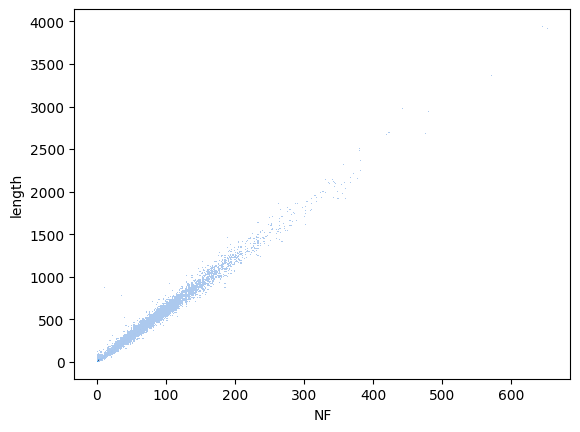

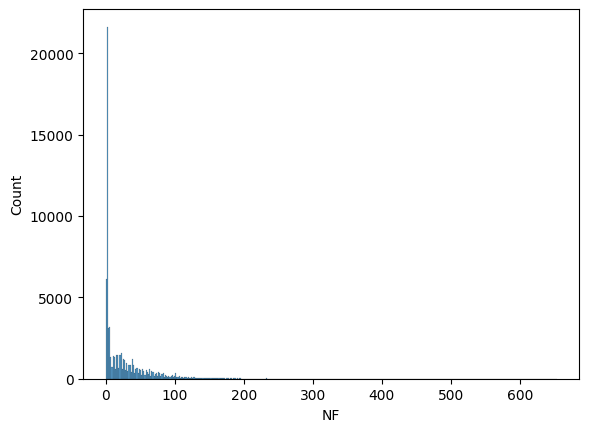

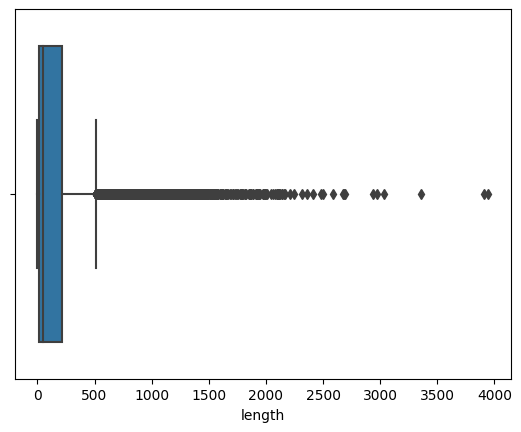

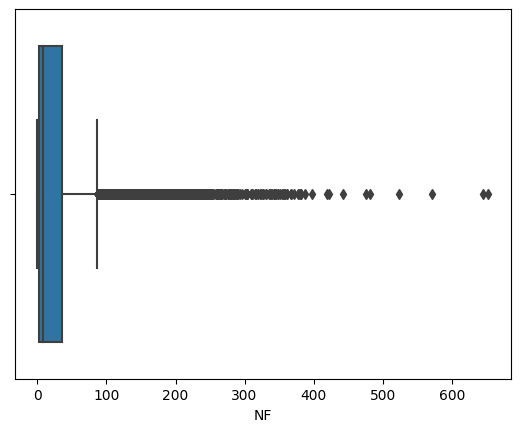

In [166]:
sns.histplot(
    data=df,
    x="NF",
    y="length",
    # bins=200,
)
plt.show()

sns.histplot(data=df, x="NF")
plt.show()

sns.boxplot(data=df, x="length")
plt.show()
sns.boxplot(data=df, x="NF")
plt.show()

In [176]:
%%bash
# https://stackoverflow.com/questions/60297162/count-the-number-of-lines-having-more-than-n-words-using-awk 

# lines with more than `num` words
awk -v num="256"  'NF >num{count++} END{print count}'  corpus_ar_preprocessed_downsampled_rom.txt

# lines with more than `num` characters
awk -v num="1000"  'length >num{count++} END{print count}'  corpus_ar_preprocessed_downsampled_rom.txt

102
695


I think we can afford to lose a max of ~12k lines (most likely less, considering overlap between word/char criteria) from our 70k dataset, if need be (or we can downsample at higher than 70k, so that we can remove more lines by word/char length and still have enough.)

Actually... BERT implementation probably does the truncation automatically, in which case our corpus is fine as-is.

> "We know that BERT has a max length limit of tokens = 512,  ... You cut the longer texts off and only use the first 512 Tokens. The original BERT implementation (and probably the others as well) truncates longer sequences automatically. For most cases, this option is sufficient." 
https://stackoverflow.com/questions/58636587/how-to-use-bert-for-long-text-classification  

On our current corpus, this much of the corpus is >256 words: 5890/70_000 = 08.414 %.

I think 8% of sentences getting truncated is fine. The majority of corpus is shorter than that, and wont get truncated at all.

In [179]:
%%bash
echo "Investigating the very short lines in corpus..."
for _num in $(seq 1 7) ; do
    echo -n "how many lines with < $_num tokens :: " 
    awk -v num=$_num  'NF <num{count++} END{print count}'  corpus_ar_preprocessed_downsampled_rom.txt
done

Investigating the very short lines in corpus...
how many lines with < 1 tokens :: 3
how many lines with < 2 tokens :: 6109
how many lines with < 3 tokens :: 19955
how many lines with < 4 tokens :: 27751
how many lines with < 5 tokens :: 30881
how many lines with < 6 tokens :: 32887
how many lines with < 7 tokens :: 34075


In [26]:
%%bash
echo "Investigating the very short lines in corpus..."
for _num in $(seq 0 7) ; do
    echo -n "how many lines with exactly $_num tokens :: " 
    awk -v num=$_num  'NF ==num{count++} END{print count}'  corpus_ar_preprocessed_downsampled_rom.txt
done

Investigating the very short lines in corpus...
how many lines with exactly 0 tokens :: 3
how many lines with exactly 1 tokens :: 6106
how many lines with exactly 2 tokens :: 13846
how many lines with exactly 3 tokens :: 7796
how many lines with exactly 4 tokens :: 3130
how many lines with exactly 5 tokens :: 2006
how many lines with exactly 6 tokens :: 1188
how many lines with exactly 7 tokens :: 671


In [25]:
%%bash
set -x
grep 'http' corpus_ar_preprocessed_downsampled_rom.txt | wc -l

grep '\[\[' corpus_ar_preprocessed_downsampled_rom.txt | wc -l
grep '\[\[' corpus_ar_preprocessed_downsampled_rom.txt | head

+ grep http corpus_ar_preprocessed_downsampled_rom.txt
+ wc -l


83


+ grep '\[\[' corpus_ar_preprocessed_downsampled_rom.txt
+ wc -l


173


+ head
+ grep '\[\[' corpus_ar_preprocessed_downsampled_rom.txt


wrghm an althwra alty ash'lha alflstynyyn kant sh'bya, wlm yustkhdm fyha alslah, ila an [[jysh aldfa' alisrayeyly|aljysh alisrayeyly]] t'aml m'ha bkl qswa, wasdr qadth alawamr bwqfha bkl altrq almmkna, fbdat altayerat
hy 'mlya tshnha qwat alahtlal alisrayeyly 'la [[qta' ghza]] mnth ywm [[27 dysmbr]] [[2008]]m kma tqwl rda 'la itlaq swarykh «qsam» 'la yd 'nasr mn mnzmty hmas waljhad alislamy alflstynytyn.
[[mlf:Annaba, algeria03.jpg|tsghyr|'naba lyla]]
fy 'am 2009 ashart altqdyrat ila an alafrad althyn ynzr fy almtwst 3,75 sa'a mn altlfaz ywmya w2,81 sa'a mn alradyw. fy tlk alsna blght alryeysya [[by by sy]] alkhdma al'ama qnwat albth l28.4% almqdra lljmy' mshahda altlfzywn, wthlath qnwat ryeysya mstqla tmthl 29.5%, walaqmar alsna'ya that ahmya mtzayda wghyrha mn alqnwat alrqmya l42.1% almtbqya. mn almby'at. wtraj't alshf mnth 1970s wfy 'am 2009 42% mn alnas 'n qra'a alshf alywmya alwtnya. wfy 'am 2010 82.5% mn skan almmlka almthda wmstkhdmy alintrnt, why a'la nsba byn 20 blda m' 'dd ak

## Etc notes

https://towardsdatascience.com/the-best-practice-of-reading-text-files-in-python-509b1d4f5a4  
    
https://pypi.org/project/textfile/  